# Analyzing AMD

In this activity, you will calculate the daily returns and then plot the results in order to evaluate a potential investment opportunity. 

Instructions:

1. Import the required libraries and dependencies.

2. Using the `read_csv` function and the `Path` module, read `amd_stock_data.csv` into a Pandas DataFrame. Be sure to set the `DateTimeIndex`. Then confirm that Pandas correctly imported the data by using both the `head` and the `tail` function.

    > **Hint** By using both `head` and `tail` to review the DataFrame, you’ll know both the start and the end date for the dataset. The end date will prove especially important as you work through the activity.

3. Check the DataFrame for missing values by using the `isnull` function.

4. Generate summary statistics for the DataFrame by using the `describe` function.

5. Drop the `volume`, `open`, `high`, and `low` columns. (You need only the `close` column for the daily returns.)

    > **Hint** For more info about dropping columns, refer to the [pandas.DataFrame.drop page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

6. Use the `pct_change` function together with the `dropna` function to calculate the daily returns DataFrame for AMD.

7. For the daily returns DataFrame, use `loc` to select slices from the `date` index to create date ranges of 1, 3, 5, and 10 years. Set each subset equal to a new variable (for example, `daily_return_1_year`) to use later.

    > **Hint** Remember that you select date ranges by using label indexing: `loc[start_date:end_date]`. To ensure that you’re analyzing the most current part of the DataFrame, your end date should equal the last date in the index. You know that date, because you confirmed the DataFrame import by using the `tail` function! You determine the time frames by changing the start date. Your date format should mimic the format of the index values.

8. Generate summary statistics for each subset&mdash;that is, the 1-year, 3-year, 5-year, and 10-year periods.

9. Use the default `plot` function to visualize the daily returns for each time period. Be sure to include a `title`, and adjust the figure size as needed.

10. Determine the time period that has the highest return value and the one that has the lowest. What are the implications of your findings?


References:

[Pandas loc function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

[Pandas describe function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

[Pandas plot function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)



## Step 1: Import the required libraries and dependencies.

In [68]:
# Import the Pandas library
import pandas as pd
# Import the Path module from the Pathlib library
from pathlib import Path
# Import the %matplotlib inline dependency
import matplotlib.pyplot as plt 
%matplotlib inline

## Step 2: Using the `read_csv` function and the `Path` module, read `amd_stock_data.csv` into a Pandas DataFrame. Be sure to set the `DateTimeIndex`. Then confirm that Pandas correctly imported the data by using both the `head` and the `tail` function.

In [69]:
# Using the read_csv function and the Path module, read in the "amd_stock_data.csv" file from the Resources folder.
# Set the `date` as the index column. 
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters
amd_df = pd.read_csv(Path("../Resources/amd_stock_data.csv"),
        index_col="date",
        parse_dates=True,
        infer_datetime_format=True
                    )

# Review the DataFrame with both the head & tail functions
display(amd_df.head())
display(amd_df.tail())
    

,close,volume,open,high,low
date,,,,,
2009-04-29,3.51,11537950,3.40,3.56,3.38
2009-04-30,3.61,18193730,3.55,3.73,3.53
2009-05-01,3.82,16233940,3.55,3.90,3.55
2009-05-04,4.26,21236940,3.90,4.30,3.83
2009-05-05,4.32,16369170,4.36,4.39,4.11


,close,volume,open,high,low
date,,,,,
2019-04-23,27.97,41583740,28.18,28.49,27.79
2019-04-24,28.46,51487330,28.10,28.85,27.93
2019-04-25,27.66,56709000,28.67,28.86,27.36
2019-04-26,27.88,48736860,27.66,27.90,27.05
2019-04-29,27.69,44265600,27.90,28.14,27.50


## Step 3: Check the DataFrame for missing values by using the `isnull` function.

In [70]:
# Using the Pandas isnull function in conjunction with the sum function, check the DataFrame for missing values
amd_df.isnull().sum()

close     0
volume    0
open      0
high      0
low       0
dtype: int64

## Step 4:Generate summary statistics for the DataFrame by using the `describe` function.

In [72]:
# Use the Pandas describe function to generate summary statistics for the DataFrame
amd_df.describe()

,close,volume,open,high,low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,7.561573,3.535586e+07,7.564402,7.727118,7.393507
std,5.814291,3.357519e+07,5.816548,5.961393,5.660075
min,1.620000,2.606577e+06,1.620000,1.690000,1.610000
25%,3.610000,1.467149e+07,3.615000,3.680000,3.540000
50%,5.950000,2.372014e+07,5.930000,6.090000,5.790000
75%,9.450000,4.286763e+07,9.450000,9.590000,9.260000
max,32.720000,3.238445e+08,33.180000,34.140000,32.190000


## Step 5: Drop the `volume`, `open`, `high`, and `low` columns. (You need only the `close` column for the daily returns.)

In [73]:
print(amd_df.columns.tolist())

['close', 'volume', 'open', 'high', 'low']


In [74]:
# Using the Pandas drop function, remove the volume, open, high and low columns
amd_df = amd_df.drop(["volume","open","high","low"], axis=1)

# Review the resulting DataFrame
display(amd_df)

,close
date,
2009-04-29,3.51
2009-04-30,3.61
2009-05-01,3.82
2009-05-04,4.26
2009-05-05,4.32
...,...
2019-04-23,27.97
2019-04-24,28.46
2019-04-25,27.66


## Step 6: Use the `pct_change` function together with the `dropna` function to calculate the daily returns DataFrame for AMD.

In [75]:
# Using the Pandas pct_change function in conjunction with the dropna function, generate the AMD daily returns DataFrame.
amd_daily_returns = amd_df.pct_change().dropna()

# Revew AMD daily returns DataFrame.
display(amd_daily_returns)

,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


## Step 7: For the daily returns DataFrame, use `loc` to select slices from the `date` index to create date ranges of 1, 3, 5, and 10 years. Set each subset equal to a new variable (for example, `daily_return_1_year`) to use later.

In [78]:
# Use the Pandas loc function to create a 1-year time slice of the AMD daily returns DataFrame
# The end date should be 2019-04-29
amd_daily_return_1_year = amd_daily_returns.loc['2018-04-30':'2019-04-29']

# Review the first 5 rows of the AMD daily return 1-year slice
amd_daily_return_1_year.head()

,close
date,
2018-04-30,-0.020702
2018-05-01,0.022978
2018-05-02,-0.014376
2018-05-03,-0.003646
2018-05-04,0.032022


In [79]:
# Use the Pandas loc function to create a 3-year time slice of the AMD daily returns DataFrame
# The end date should be 2019-04-29
amd_daily_return_3_year = amd_daily_returns.loc['2016-04-30':'2019-04-29']

# Review the first 5 rows of the AMD daily return 3-year slice
amd_daily_return_3_year.head()

,close
date,
2016-05-02,0.053521
2016-05-03,-0.037433
2016-05-04,0.000000
2016-05-05,0.016667
2016-05-06,0.005464


In [80]:
# Use the Pandas loc function to create a 5-year time slice of the AMD daily returns DataFrame
# The end date should be 2019-04-29
amd_daily_return_5_year = amd_daily_returns.loc['2014-04-30':'2019-04-29']

# Review the first 5 rows of the AMD daily return 5-year slice
amd_daily_return_5_year.head()


,close
date,
2014-04-30,0.014888
2014-05-01,0.026895
2014-05-02,-0.019048
2014-05-05,-0.007282
2014-05-06,-0.019560


In [81]:
# Use the Pandas loc function to create a 10-year time slice of the AMD daily returns DataFrame
# The end date should be 2019-04-29
amd_daily_return_10_year = amd_daily_returns.loc['2009-04-30':'2019-04-29']

# Review the first 5 rows of the AMD daily return 10-year slice
amd_daily_return_10_year.head()


,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315


## Step 8: Generate summary statistics for each subset&mdash;that is, the 1-year, 3-year, 5-year, and 10-year periods.

In [83]:
# Use the Pandas describe function to generate summary statistics for the 1-year time slice 
amd_daily_return_1_year.describe()

,close
count,251.000000
mean,0.004538
std,0.042522
min,-0.154454
25%,-0.015975
50%,0.002397
75%,0.023978
max,0.199481


In [84]:
# Use the Pandas describe function to generate summary statistics for the 3-year time slice
amd_daily_return_3_year.describe()

,close
count,753.000000
mean,0.003481
std,0.038763
min,-0.242291
25%,-0.016523
50%,0.002099
75%,0.021638
max,0.199481


In [85]:
# Use the Pandas describe function to generate summary statistics for the 5-year time slice 
amd_daily_return_5_year.describe()

,close
count,1258.000000
mean,0.002304
std,0.039953
min,-0.242291
25%,-0.016535
50%,0.000776
75%,0.019021
max,0.522901


In [86]:
# Use the Pandas describe function to generate summary statistics for the 10-year time slice
amd_daily_return_10_year.describe()

,close
count,2516.000000
mean,0.001488
std,0.036897
min,-0.242291
25%,-0.016844
50%,0.000000
75%,0.018524
max,0.522901


## Step 9: Use the default `plot` function to visualize the daily returns for each time period. Be sure to include a `title`, and adjust the figure size as needed.

<AxesSubplot:title={'center':'AMD 1 YR Daily'}, xlabel='date'>

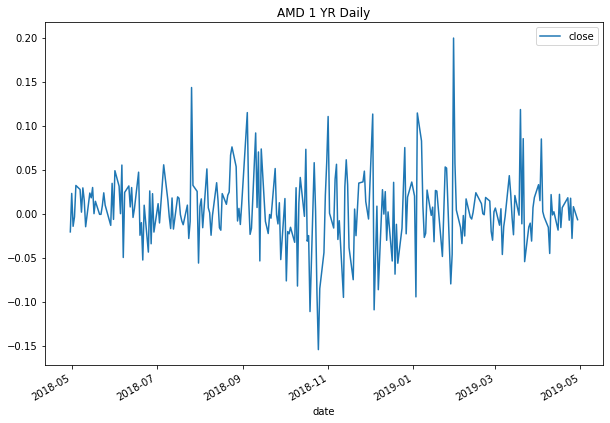

In [88]:
# Use the Pandas plot function to plot the daily return data for the 1-year time slice
# Adjust the figsize and be sure to include a plot title
amd_daily_return_1_year.plot(figsize=(10,7),title='AMD 1 YR Daily')

<AxesSubplot:title={'center':'AMD 3 YR Daily'}, xlabel='date'>

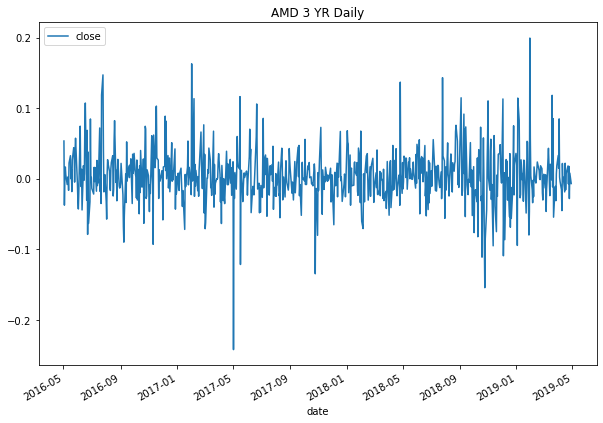

In [89]:
# Use the Pandas plot function to plot the daily return data for the 3-year time slice 
# Adjust the figsize and be sure to include a plot title
amd_daily_return_3_year.plot(figsize=(10,7),title='AMD 3 YR Daily')

<AxesSubplot:title={'center':'AMD 5 YR Daily'}, xlabel='date'>

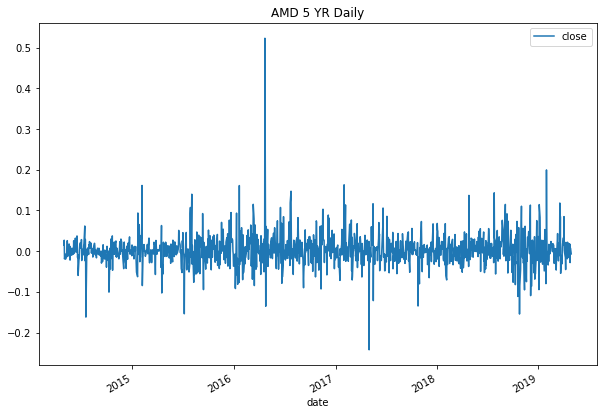

In [90]:
# Use the Pandas plot function to plot the daily return data for the 5-year time slice
# Adjust the figsize and be sure to include a plot title
amd_daily_return_5_year.plot(figsize=(10,7),title='AMD 5 YR Daily')

<AxesSubplot:title={'center':'AMD 10 YR Daily'}, xlabel='date'>

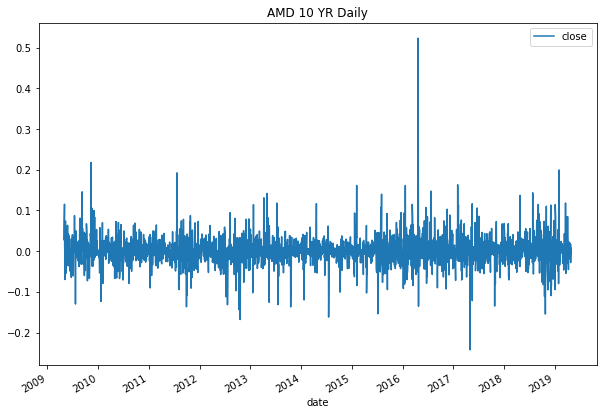

In [91]:
# Use the Pandas plot function to plot the daily return data for the 10-year time slice 
# Adjust the figsize and be sure to include a plot title 
amd_daily_return_10_year.plot(figsize=(10,7),title='AMD 10 YR Daily')

## Step 10: Determine the time period that has the highest return value and the one that has the lowest. What are the implications of your findings?

**Question 1:** What are the average daily returns over each of the 1, 3, 5, and 10-year time slices? Which slice had the highest daily average return and which had the lowest?
 
**Answer 1:** # YOUR ANSWER HERE

**Question 2:** What insights could this provide with regard to trading AMD stock over the long vs. short-term?

**Answer 2:** # YOUR ANSWER HERE